
.. redirect-from:: /tutorials/colors/colors


# Specifying colors

## Color formats

Matplotlib recognizes the following formats to specify a color.

+--------------------------------------+--------------------------------------+
| Format                               | Example                              |
+======================================+======================================+
| RGB or RGBA (red, green, blue, alpha)| - ``(0.1, 0.2, 0.5)``                |
| tuple of float values in a closed    | - ``(0.1, 0.2, 0.5, 0.3)``           |
| interval [0, 1].                     |                                      |
+--------------------------------------+--------------------------------------+
| Case-insensitive hex RGB or RGBA     | - ``'#0f0f0f'``                      |
| string.                              | - ``'#0f0f0f80'``                    |
+--------------------------------------+--------------------------------------+
| Case-insensitive RGB or RGBA string  | - ``'#abc'`` as ``'#aabbcc'``        |
| equivalent hex shorthand of          | - ``'#fb1'`` as ``'#ffbb11'``        |
| duplicated characters.               |                                      |
+--------------------------------------+--------------------------------------+
| String representation of float value | - ``'0'`` as black                   |
| in closed interval ``[0, 1]`` for    | - ``'1'`` as white                   |
| grayscale values.                    | - ``'0.8'`` as light gray            |
+--------------------------------------+--------------------------------------+
| Single character shorthand notation  | - ``'b'`` as blue                    |
| for some basic colors.               | - ``'g'`` as green                   |
|                                      | - ``'r'`` as red                     |
| .. note::                            | - ``'c'`` as cyan                    |
|    The colors green, cyan, magenta,  | - ``'m'`` as magenta                 |
|    and yellow do not coincide with   | - ``'y'`` as yellow                  |
|    X11/CSS4 colors. Their particular | - ``'k'`` as black                   |
|    shades were chosen for better     | - ``'w'`` as white                   |
|    visibility of colored lines       |                                      |
|    against typical backgrounds.      |                                      |
+--------------------------------------+--------------------------------------+
| Case-insensitive X11/CSS4 color name | - ``'aquamarine'``                   |
| with no spaces.                      | - ``'mediumseagreen'``               |
+--------------------------------------+--------------------------------------+
| Case-insensitive color name from     | - ``'xkcd:sky blue'``                |
| `xkcd color survey`_ with ``'xkcd:'``| - ``'xkcd:eggshell'``                |
| prefix.                              |                                      |
+--------------------------------------+--------------------------------------+
| Case-insensitive Tableau Colors from | - ``'tab:blue'``                     |
| 'T10' categorical palette.           | - ``'tab:orange'``                   |
|                                      | - ``'tab:green'``                    |
|                                      | - ``'tab:red'``                      |
|                                      | - ``'tab:purple'``                   |
| .. note:: This is the default color  | - ``'tab:brown'``                    |
|           cycle.                     | - ``'tab:pink'``                     |
|                                      | - ``'tab:gray'``                     |
|                                      | - ``'tab:olive'``                    |
|                                      | - ``'tab:cyan'``                     |
+--------------------------------------+--------------------------------------+
| "CN" color spec where ``'C'``        | - ``'C0'``                           |
| precedes a number acting as an index | - ``'C1'``                           |
| into the default property cycle.     +--------------------------------------+
|                                      | :rc:`axes.prop_cycle`                |
| .. note:: Matplotlib indexes color   |                                      |
|           at draw time and defaults  |                                      |
|           to black if cycle does not |                                      |
|           include color.             |                                      |
+--------------------------------------+--------------------------------------+
| Tuple of one of the above color      | - ``('green', 0.3)``                 |
| formats and an alpha float.          | - ``('#f00', 0.9)``                  |
|                                      |                                      |
| .. versionadded:: 3.8                |                                      |
+--------------------------------------+--------------------------------------+
| The special value "none" is fully    | - ``'none'``                         |
| transparent, i.e. equivalent to a    |                                      |
| RGBA value ``(0.0, 0.0, 0.0, 0.0)``  |                                      |
+--------------------------------------+--------------------------------------+


.. seealso::

    The following links provide more information on colors in Matplotlib.
        * :doc:`/gallery/color/color_demo` Example
        * `matplotlib.colors` API
        * :doc:`/gallery/color/named_colors` Example

"Red", "Green", and "Blue" are the intensities of those colors. In combination,
they represent the colorspace.

## Transparency

The *alpha* value of a color specifies its transparency, where 0 is fully
transparent and 1 is fully opaque. When a color is semi-transparent, the
background color will show through.

The *alpha* value determines the resulting color by blending the
foreground color with the background color according to the formula

\begin{align}RGB_{result} = RGB_{background} * (1 - \alpha) + RGB_{foreground} * \alpha\end{align}

The following plot illustrates the effect of transparency.


(-0.2, 13.0, -1.0, 1.0)

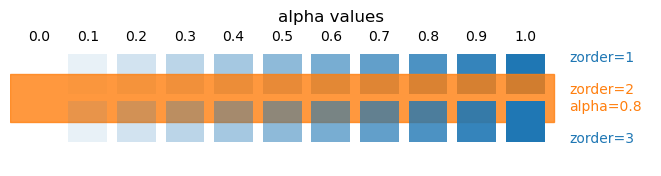

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(6.5, 1.65), layout='constrained')
ax.add_patch(Rectangle((-0.2, -0.35), 11.2, 0.7, color='C1', alpha=0.8))
for i, alpha in enumerate(np.linspace(0, 1, 11)):
    ax.add_patch(Rectangle((i, 0.05), 0.8, 0.6, alpha=alpha, zorder=0))
    ax.text(i+0.4, 0.85, f"{alpha:.1f}", ha='center')
    ax.add_patch(Rectangle((i, -0.05), 0.8, -0.6, alpha=alpha, zorder=2))
ax.set_xlim(-0.2, 13)
ax.set_ylim(-1, 1)
ax.set_title('alpha values')
ax.text(11.3, 0.6, 'zorder=1', va='center', color='C0')
ax.text(11.3, 0, 'zorder=2\nalpha=0.8', va='center', color='C1')
ax.text(11.3, -0.6, 'zorder=3', va='center', color='C0')
ax.axis('off')

The orange rectangle is semi-transparent with *alpha* = 0.8. The  top row of
blue squares is drawn below and the bottom row of blue squares is drawn on
top of the orange rectangle.

See also :doc:`/gallery/misc/zorder_demo` to learn more on the drawing order.


## "CN" color selection

Matplotlib converts "CN" colors to RGBA when drawing Artists. The
`color_cycle` section contains additional
information about controlling colors and style properties.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128)


def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title(f'style: {sty!r}', color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()


demo('default')
demo('seaborn-v0_8')

The first color ``'C0'`` is the title. Each plot uses the second and third
colors of each style's :rc:`axes.prop_cycle`. They are ``'C1'`` and ``'C2'``,
respectively.


## Comparison between X11/CSS4 and xkcd colors

The xkcd colors come from a [user survey conducted by the webcomic xkcd](https://blog.xkcd.com/2010/05/03/color-survey-results/)_.

95 out of the 148 X11/CSS4 color names also appear in the xkcd color survey.
Almost all of them map to different color values in the X11/CSS4 and in
the xkcd palette. Only 'black', 'white' and 'cyan' are identical.

For example, ``'blue'`` maps to ``'#0000FF'`` whereas ``'xkcd:blue'`` maps to
``'#0343DF'``.  Due to these name collisions, all xkcd colors have the
``'xkcd:'`` prefix.

The visual below shows name collisions. Color names where color values agree
are in bold.



In [ ]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

fig = plt.figure(figsize=[9, 5])
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = len(overlap) // n_groups + 1

for j, color_name in enumerate(sorted(overlap)):
    css4 = mcolors.CSS4_COLORS[color_name]
    xkcd = mcolors.XKCD_COLORS[f'xkcd:{color_name}'].upper()

    # Pick text colour based on perceived luminance.
    rgba = mcolors.to_rgba_array([css4, xkcd])
    luma = 0.299 * rgba[:, 0] + 0.587 * rgba[:, 1] + 0.114 * rgba[:, 2]
    css4_text_color = 'k' if luma[0] > 0.5 else 'w'
    xkcd_text_color = 'k' if luma[1] > 0.5 else 'w'

    col_shift = (j // n_rows) * 3
    y_pos = j % n_rows
    text_args = dict(fontsize=10, weight='bold' if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0.5 + col_shift, y_pos + .7, css4,
            color=css4_text_color, ha='center', **text_args)
    ax.text(1.5 + col_shift, y_pos + .7, xkcd,
            color=xkcd_text_color, ha='center', **text_args)
    ax.text(2 + col_shift, y_pos + .7, f'  {color_name}', **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color='0.7', linewidth=1)
    ax.text(0.5 + 3*g, -0.3, 'X11/CSS4', ha='center')
    ax.text(1.5 + 3*g, -0.3, 'xkcd', ha='center')

ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()